### Домашнее задание

* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов
* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

##### Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib import colors

In [30]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [6]:
iris = load_iris()

In [14]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

##### Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [92]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)', 'sepal width (cm)']]
# признаки для каждого класса растений
data_class = iris.target

In [93]:
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [94]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
# Проверим корреляцию признаков
data[['sepal width (cm)', 'sepal length (cm)']].corr(method='pearson')
# корреляция низкая, значит все ок

,sepal width (cm),sepal length (cm)
sepal width (cm),1.00000,-0.11757
sepal length (cm),-0.11757,1.00000


<Figure size 1152x720 with 0 Axes>

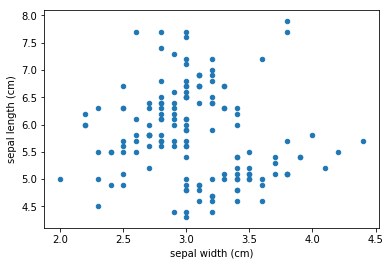

In [96]:
plt.figure(figsize=(16, 10))
data.plot(kind='scatter', x='sepal width (cm)', y='sepal length (cm)')
# визуально видно, что можно провести такую линию, спроецировав все точки на нее, 
# чтобы центры двух групп точек были максимально удалены друг от друга

##### Разделите данные на выборку для обучения и тестирования

In [97]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [99]:
len(X_train)

112

In [100]:
len(X_test)

38

##### Постройте модель LDA

In [104]:
# импортируем LDA-функционал, который построит нам линию, на которую спроецируются все точки
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [105]:
lda = LinearDiscriminantAnalysis()

In [106]:
# обучаем модель на нашей тренировочной выборке
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [112]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2,
       0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0])

In [186]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head(10)
# визуально можно сказать, что в целом наша модель справилась не очень хорошо, 
# так как есть разница между прогнозом и фактом

,0,1
0,2,2
1,0,0
2,2,2
3,0,0
4,1,1
5,2,2
6,2,1
7,2,2
8,2,2
9,1,2


In [114]:
# проверим качество нашей модели
# соотношение количетсва верных прогнозов к общему количеcтву прогнозов
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(y_test, lda.predict(X_test))
# точность довольно низкая

0.7368421052631579

In [116]:
# посмотрим на коэфф дискриминант
lda.coef_
# у нас получилось 3 класса и 2 признака в каждом классе

array([[-5.21386826,  7.37985743],
       [ 1.36820209, -3.25829304],
       [ 4.0593143 , -4.35054018]])

##### Визуализируйте предсказания для тестовой выборки и центры классов

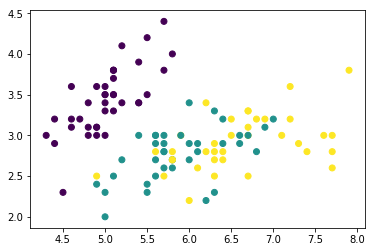

In [122]:
# проверим качество модели
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()
# из визуализации не совсем понятно, как из признаков важнее, так как видно, 
# что влияет как первый признак, так и второй

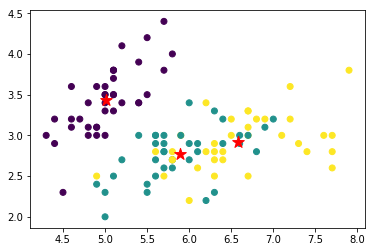

In [193]:
# видно, что центры двух классов находятся очень близко к друг другу при этом имеют большой разборос величин, 
# что не позволяет их разделить должным образом
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

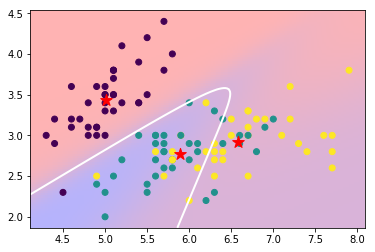

In [125]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [ ]:
# в данном случаем мы делали прогноз по уже существующим классам и делили выборку на 3 класса
# что в целом получилось не очень точно

##### Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [133]:
# у нас есть 2 признака каждого объекта, отбрасываем целевую переменную с известными классами
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


##### Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [135]:
# в данном случаем мы будем использовать алгоритм к-means, который сможет кластеризировать нашу выборку
# без известной принадлежности того или иного объекта выборки к классу
from sklearn.cluster import KMeans

In [174]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)

In [175]:
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

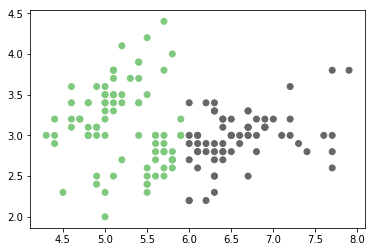

In [176]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='Accent', c=clusters)

In [216]:
# Построим график локтя для определения оптимального количетсва кластеров нашей модели
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 21)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(data)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

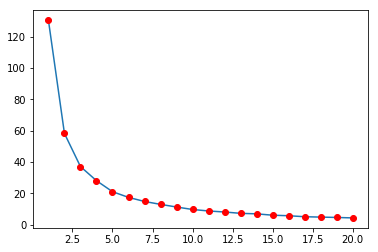

In [217]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
#судя графику нужно взять 3 кластера, так как в этой точно больше всего начинает сглаживаться

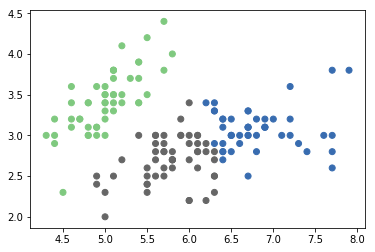

In [219]:
# построем распределение наших трех кластеров
# если бы решалась какая то бизнес задача, то можно было руководствоваться тем, 
# сколько кластеров клиентов нам нужно
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='Accent', c=clusters)